In [1]:
from pylab import *
%matplotlib inline

### 1. Realice un notebook en el se programen y expliquen los siguientes algoritmos de integraci´on de ecuacionesdiferenciales:
(a) Integración con método de Euler

(b) Integración sobre serie de Taylor a 2◦ orden

(c) Integración con método de Runge-Kutta de 2◦ orden

(d) Integración con método de Runge-Kutta de 4◦ orden


Expresiones analíticas de los métodos de integración.

### Método de Euler

$$
\vec{y}_{n+1} = \vec{y}_{n} + \vec{f}(\vec y_n,t_n)*h
$$

La deducción de este método viene de aplicar la aproximación lineal dada por la derivada de la funcion ($\vec f(\vec y,t)$).

### Método de Euler a Segundo Orden

$$
\vec{y}_{n+1} = \vec{y}_{n} + \vec{f}(\vec y_n,t_n)*h + \left(\frac{\partial \vec f(\vec y_n,t_n)}{\partial t} + \mathbb{\vec J}(\vec y_n, t_n) \dot{} \vec{f}(\vec y_n,t_n)\right)*\frac{h^2}{2}
$$

Este método se deduce al aplicar una aproximación a segundo orden de la función ($\vec f(\vec y,t)$), por lo que si quitamos los ordenes $\mathbb{O}(h^2)$, recuperamos Euler a primer orden.

### Runge-Kutta 2

$$
k_1 = \vec{f}(\vec y_n, t_n) *h
$$
$$
\vec{y}_{n+1} = \vec{y}_n + \vec{f}(\vec y_n + k_1,t_n + \frac{h}{2})*h
$$

### Runge-Kutta 4

$$
k_1=\vec{f}(\vec y_n,t_n)
$$
$$
k_2 = \vec{f}(\vec y_n + \frac{hk_1}{2},t_n + \frac{h}{2})
$$
$$
k_3 = \vec{f}(\vec y_n + \frac{hk_2}{2},t_n+\frac{h}{2})
$$
$$
k_4 = \vec{f}(\vec y_n + hk_3,t+h)
$$
$$
\vec{y}_{n+1} = \vec y_{n} + \left(k_1 + 2k_2 + 2k_3 + k_4 \right)\frac{h}{6}
$$

Tanto el método RK2 y RK4 son métodos algebraicos, se obtienen al realizar un desarrollo similar al método de Euler y mediante pasos algebraicos encontrar a $\vec{y_n}$ como función de $\vec f(\vec y_n, t)$ y $\vec{y_n}$.

El error de estos métodos es de orden $\mathbb{O}(h^4)$ y $\mathbb{O}(h^6)$

In [2]:
def euler(ec,p_ini,x,h=0.1): #metodo de euler es una integración de primer orden
    tiempos = arange(x[0],x[1]+h,h) #se hace una lista para los tiempos con una separacion de h, que corre en el intervalo de integracion
    sol = zeros((len(tiempos),len(p_ini))) #solucion sera una lista de zeros de la misma longitud que tiempos
    sol[0,:]=p_ini #el primer elemento de mi solucion corresponde a la condicion inicial
    for t in xrange(len(tiempos)-1): #para cada tiempo
        f=ec(sol[t,:],tiempos[t]) #f es la ecuacion diferencial valuada en el punto anterior y en el tiempo anterior
        sol[t+1,:] = sol[t,:] + (h*f) #la solucion vale lo que valia en el punto anterio mas la aproximacion lineal (metodo de Euler)
    return tiempos,sol #me devuelve los tiempos y la solucion

def integra2(ec,d_ec,p_ini,x,h=0.1): #metodo de euler a segundo orden, una integracion de orden cuadratico
    tiempos = arange(x[0],x[1]+h,h) #se hace una lista para los tiempos con una separacion de h, que corre en el intervalo de integracion
    sol = zeros((len(tiempos),len(p_ini))) #solucion sera una lista de zeros de la misma longitud que tiempos
    sol[0,:]=p_ini #el primer elemento de mi solucion corresponde a la condicion inicial
    for t in xrange(len(tiempos)-1):  #para cada tiempo
        f=ec(sol[t,:],tiempos[t])  #f es la ecuacion diferencial valuada en el punto anterior y en el tiempo anterior
        df=d_ec(sol[t,:],tiempos[t])[0] #parcial de f respecto a t valuada
        jac=d_ec(sol[t,:],tiempos[t])[1] #jacobiano de f valuado
        sol[t+1,:] = sol[t,:] + (h*f) + (0.5*h*h)*(df+dot(jac,f)) #la solucion vale lo que valia en el punto anterior mas una correcion lineal (euler) + otra correccion de segundo orden
    return tiempos,sol #me devuelve tiempos y solucion

def RK2(funcion,p_ini,x,h=0.1): #metodo RK2 es un metodo de 2° orden
    tiempos=arange(x[0],x[1]+h,h) #se hace una lista para los tiempos con una separacion de h, que corre en el intervalo de integracion
    sol = zeros((len(tiempos),len(p_ini))) #solucion sera una lista de zeros de la misma longitud que tiempos
    sol[0,:]=p_ini #el primer elemento de mi solucion corresponde a la condicion inicial
    for i in xrange(len(tiempos)-1):  #para cada tiempo
        t=tiempos[i] #t es el tiempo i-esimo
        y_n=sol[i,:] #y_n es la solucion al tiempo i
        k_1=h*funcion(y_n,t) #k1 es el primer coeficiente del desarrollo de Runge-Kutta
        sol[i+1,:]= y_n + h*funcion(y_n+k_1,t+0.5*h) #la solucion es igual a su valor anteriormente mas la funcion evaluada, en un tiempo posterior de pasa 0.5h
    return tiempos,sol #devuelve tiempos y solucion

def RK4(funcion,p_ini,x,h=0.1): #metodo RK4 es un metodo de 4° Orden
    tiempos=arange(x[0],x[1]+h,h) #se hace una lista para los tiempos con una separacion de h, que corre en el intervalo de integracion
    sol = zeros((len(tiempos),len(p_ini))) #solucion sera una lista de zeros de la misma longitud que tiempos
    sol[0,:]=p_ini #el primer elemento de mi solucion corresponde a la condicion inicial
    for i in xrange(len(tiempos)-1): #para cada tiempo
        t=tiempos[i] #t es el tiempo i-esimo
        y_n=sol[i,:] #y_n es la solucion al tiempo i
        k_1=funcion(y_n,t) #k1,k2,k3 y k4 son coeficientes que se obtienen de manera algebraica en el desarrollo Runge Kutta
        k_2=funcion(y_n + 0.5*h*k_1,t+0.5*h)
        k_3=funcion(y_n + 0.5*h*k_2,t+0.5*h)
        k_4=funcion(y_n + k_3*h,t+h)
        sol[i+1,:]= y_n + (h/6)*(k_1+2*k_2+2*k_3+k_4) #solucion es igual a su valor anterior mas la correcion algebraica de los coeficiente k's calculados
    return tiempos,sol #devuelve tiempos y solucion

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $y(t)$:

$$
\ddot{x} + 0.5\dot{x} + sin(x) = e^{-t}sin(3t)
$$

Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$

In [3]:
def ec_dif(x,t): #defino la ecuacion diferencial a integrar
    return array([x[1],-sin(x[0])-0.5*x[1]+exp(-t)*sin(3*t)])

def jac(x,t): #defino la funcion que tiene la parcial de f respecto a t asi como el jacobiano de f
    return array([0,exp(-t)*(3*cos(3*t)-sin(3*t))]),array([[0,1],[-cos(x[0]),-0.5]])

In [4]:
t1,sol1=euler(ec_dif,[0,1],[0,10*pi],0.001) #soluciones con mis 4 integradores, notese que el paso de integracion h varia en cada metodo dependiendo de su convergencia
t2,sol2=integra2(ec_dif,jac,[0,1],[0,10*pi])
t3,sol3=RK2(ec_dif,[0,1],[0,10*pi],0.01)
t4,sol4=RK4(ec_dif,[0,1],[0,10*pi])

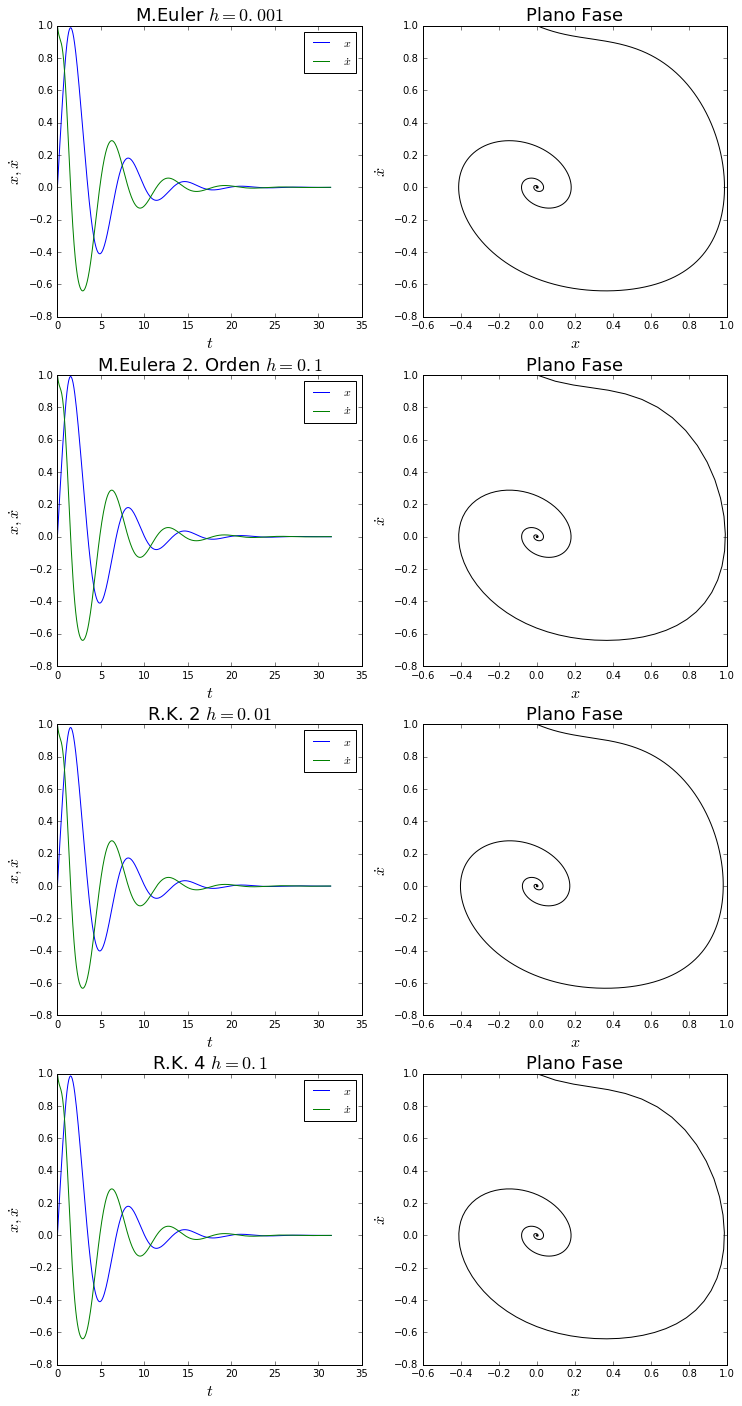

In [5]:
figure(figsize=(12,24),dpi=100) #graficas de x y x' respecto a t asi como el plano fase con los 4 integradores.
subplot(4,2,1)
plot(t1,sol1[:,0],label=r'$x$')
plot(t1,sol1[:,1],label=r'$\dot{x}$')
title('M.Euler $h=0.001$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$x,\dot{x}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1,1))
subplot(4,2,2)
plot(sol1[:,0],sol1[:,1],'k')
title('Plano Fase',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$\dot{x}$',fontsize=16)
xlabel(r'$x$',fontsize=16)
subplot(4,2,3)
plot(t2,sol2[:,0],label=r'$x$')
plot(t2,sol2[:,1],label=r'$\dot{x}$')
title('M.Eulera 2. Orden $h=0.1$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$x,\dot{x}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1,1))
subplot(4,2,4)
plot(sol2[:,0],sol2[:,1],'k')
title('Plano Fase',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$\dot{x}$',fontsize=16)
xlabel(r'$x$',fontsize=16)
subplot(4,2,5)
plot(t3,sol3[:,0],label=r'$x$')
plot(t3,sol3[:,1],label=r'$\dot{x}$')
title('R.K. 2 $h=0.01$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$x,\dot{x}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1,1))
subplot(4,2,6)
plot(sol3[:,0],sol3[:,1],'k')
title('Plano Fase',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$\dot{x}$',fontsize=16)
xlabel(r'$x$',fontsize=16)
subplot(4,2,7)
plot(t4,sol4[:,0],label=r'$x$')
plot(t4,sol4[:,1],label=r'$\dot{x}$')
title('R.K. 4 $h=0.1$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$x,\dot{x}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1,1))
subplot(4,2,8)
plot(sol4[:,0],sol4[:,1],'k')
title('Plano Fase',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$\dot{x}$',fontsize=16)
xlabel(r'$x$',fontsize=16)
show()

### 2.Utilizando los integradores anteriores encuentre el mejor paso de integración para la siguiente ecuación:

$$
\dddot{y} + \ddot{y}^2 - 3\dot{y}^3 + cos^2(y) = e^{-t}sin(3t)
$$

Con condiciones iniciales $\ddot{y}(1) = 1$, $\dot{y}(1) = 2$, $y(1) = 1$. En particular que sucede en el intervalo $t \in [1,2]$y $t \in [1, 2.1]$.


In [6]:
def ec_dif2(x,t): #ecuacion diferencial a integrar
    return array([x[1],x[2],-(x[2]**2)+3*(x[1]**3)-((cos(x[0]))**2)+exp(-t)*sin(3*t)])

def jac2(x,t): #parcial de f respecto a t y jacobiano de f
    return array([0,0,exp(-t)*(3*cos(3*t)-sin(3*t))]),array([[0,1,0],[0,0,1],[sin(2*x[0]),9*x[1]*x[1],-2*x[2]]])

In [7]:
t1,sol1=euler(ec_dif2,[1,2,1],[1.,1.95],0.000005)
t2,sol2=integra2(ec_dif2,jac2,[1,2,1],[1.,1.95],0.00001)
t3,sol3=RK2(ec_dif2,[1,2,1],[1.,1.95],0.000005)
t4,sol4=RK4(ec_dif2,[1,2,1],[1.,1.95],0.00001)

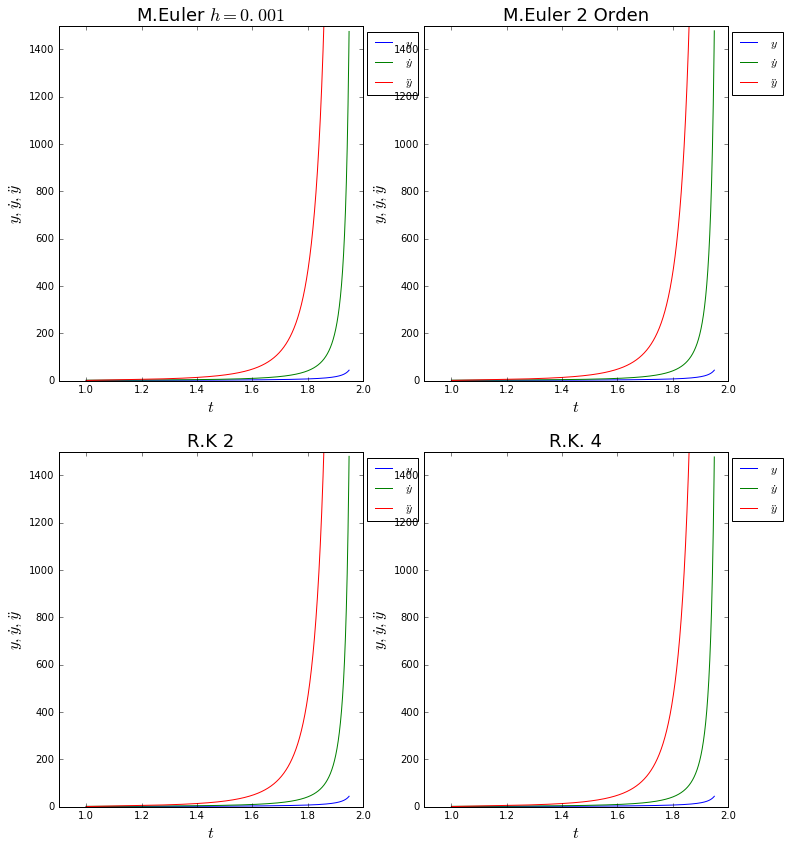

In [8]:
figure(figsize=(12,14),dpi=100) #soluciones para y,y´e y'' graficas se cortan para mejor apreciacion, vemos como y´´ crece muy rapido
subplot(2,2,1)
plot(t1,sol1[:,0],label=r'$y$')
plot(t1,sol1[:,1],label=r'$\dot{y}$')
plot(t1,sol1[:,2],label=r'$\ddot{y}$')
title('M.Euler $h=0.001$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2)
ylim(0,1500)
subplot(2,2,2)
plot(t2,sol2[:,0],label=r'$y$')
plot(t2,sol2[:,1],label=r'$\dot{y}$')
plot(t2,sol2[:,2],label=r'$\ddot{y}$')
title('M.Euler 2 Orden',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2)
ylim(0,1500)
subplot(2,2,3)
plot(t3,sol3[:,0],label=r'$y$')
plot(t3,sol3[:,1],label=r'$\dot{y}$')
plot(t3,sol3[:,2],label=r'$\ddot{y}$')
title('R.K 2',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2)
ylim(0,1500)
subplot(2,2,4)
plot(t4,sol4[:,0],label=r'$y$')
plot(t4,sol4[:,1],label=r'$\dot{y}$')
plot(t4,sol4[:,2],label=r'$\ddot{y}$')
title('R.K. 4',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2)
ylim(0,1500)
show()

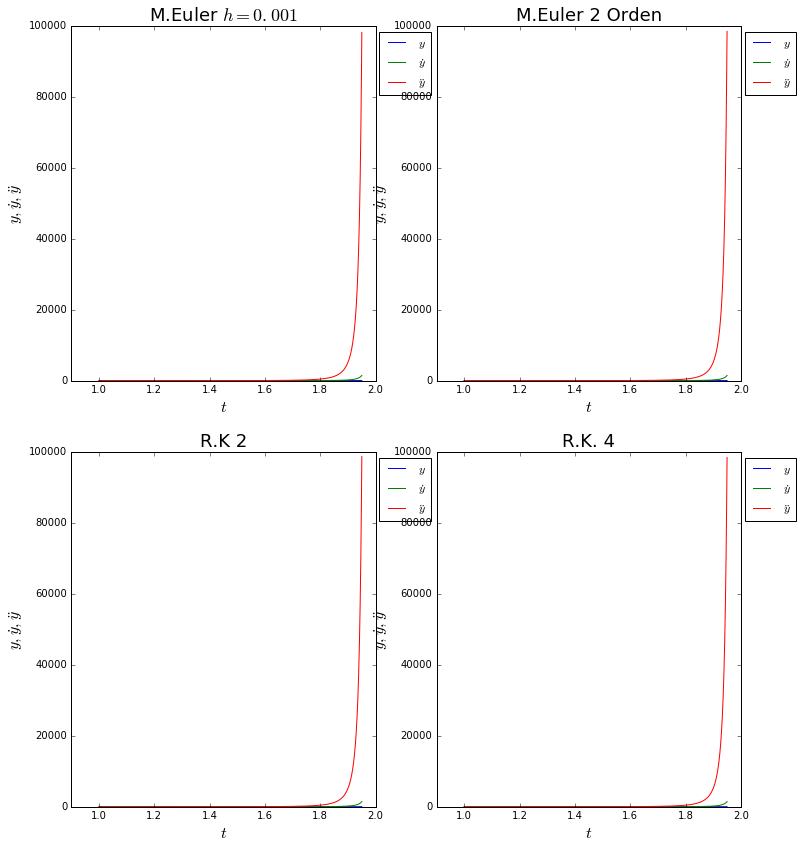

In [9]:
figure(figsize=(12,14),dpi=100) #soluciones de y,y',y'' donde se aprecia la singularidad (asintota) en 2 para y''
subplot(2,2,1)
plot(t1,sol1[:,0],label=r'$y$')
plot(t1,sol1[:,1],label=r'$\dot{y}$')
plot(t1,sol1[:,2],label=r'$\ddot{y}$')
title('M.Euler $h=0.001$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2)
ylim(0,100000)
subplot(2,2,2)
plot(t2,sol2[:,0],label=r'$y$')
plot(t2,sol2[:,1],label=r'$\dot{y}$')
plot(t2,sol2[:,2],label=r'$\ddot{y}$')
title('M.Euler 2 Orden',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2)
ylim(0,100000)
subplot(2,2,3)
plot(t3,sol3[:,0],label=r'$y$')
plot(t3,sol3[:,1],label=r'$\dot{y}$')
plot(t3,sol3[:,2],label=r'$\ddot{y}$')
title('R.K 2',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2)
ylim(0,100000)
subplot(2,2,4)
plot(t4,sol4[:,0],label=r'$y$')
plot(t4,sol4[:,1],label=r'$\dot{y}$')
plot(t4,sol4[:,2],label=r'$\ddot{y}$')
title('R.K. 4',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2)
ylim(0,100000)
show()

En este caso vemos como hay una asintota para $\ddot{y}$ lo que hace que la funcion diverga al acercarse a 2, a consecuencia de eso se ocupa un paso de integracion muy pequeño a medida que se acerca a la singularidad, ademas que la convergencia del método es menos segura al rededor de ese punto.

In [10]:
t1,sol1=euler(ec_dif2,[1,2,1],[1.,2.1],0.000005) #soluciones en el intervalo [1,2.1]
t2,sol2=integra2(ec_dif2,jac2,[1,2,1],[1.,2.1],0.00001)
t3,sol3=RK2(ec_dif2,[1,2,1],[1.,2.1],0.000005)
t4,sol4=RK4(ec_dif2,[1,2,1],[1.,2.1],0.00001)

C:\Users\brianhumberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\brianhumberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app
C:\Users\brianhumberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\brianhumberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
C:\Users\brianhumberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in add


Existe un error ya que cruzamos la asintota y nuestro método no tiene convergencia, dada la divergencia de la funcion en 2, por lo que las graficas obtenidas cerca de 2 no van a corresponder con el comportamiento de la ecuacion diferencial.

C:\Users\brianhumberto\Anaconda2\lib\site-packages\matplotlib\transforms.py:660: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


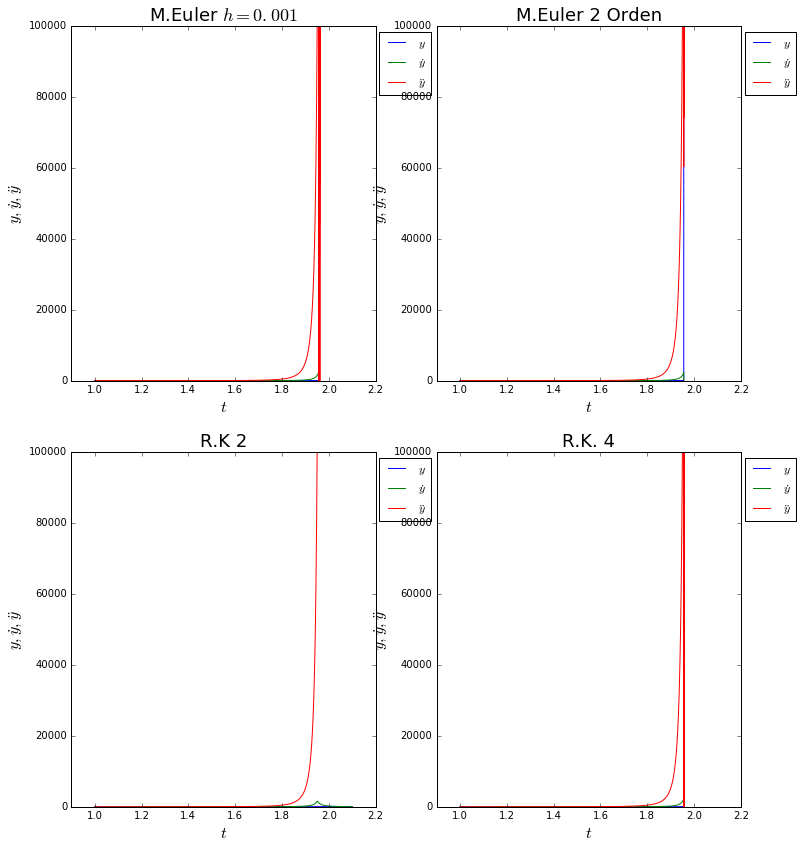

In [11]:
figure(figsize=(12,14),dpi=100) #graficas del intervalo [1,2.1]
subplot(2,2,1)
plot(t1,sol1[:,0],label=r'$y$')
plot(t1,sol1[:,1],label=r'$\dot{y}$')
plot(t1,sol1[:,2],label=r'$\ddot{y}$')
title('M.Euler $h=0.001$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2.2)
ylim(0,100000)
subplot(2,2,2)
plot(t2,sol2[:,0],label=r'$y$')
plot(t2,sol2[:,1],label=r'$\dot{y}$')
plot(t2,sol2[:,2],label=r'$\ddot{y}$')
title('M.Euler 2 Orden',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2.2)
ylim(0,100000)
subplot(2,2,3)
plot(t3,sol3[:,0],label=r'$y$')
plot(t3,sol3[:,1],label=r'$\dot{y}$')
plot(t3,sol3[:,2],label=r'$\ddot{y}$')
title('R.K 2',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2.2)
ylim(0,100000)
subplot(2,2,4)
plot(t4,sol4[:,0],label=r'$y$')
plot(t4,sol4[:,1],label=r'$\dot{y}$')
plot(t4,sol4[:,2],label=r'$\ddot{y}$')
title('R.K. 4',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y,\dot{y},\ddot{y}$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
xlim(0.9,2.2)
ylim(0,100000)
show()

Las gráficas nos muestran como la integración de $t \in [1,2.1]$, tiene una asintota en 2, y ademas en ese punto ningun integrador converge, cada uno arroja cosas distintas ya que al operar cerca de la singularidas el método numérico falla.

### 3. Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parámetros al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial.

$$
\ddot{x} + \frac{1}{10}\dot{x} + 4sin(x) = \frac{1}{2}sin(\omega t)
$$

Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$ y para $\omega = {1, 1.1, 1.2, 1.3, ..., 2.9, 3}$. Realice la gráfica
de algunas soluciones que representen el comportamiento de la solución en función de $\omega$ y explique su resultado.

In [12]:
def euler_arg(ec,p_ini,x,h=0.1,args=[]): #al algoritmo ya hecho le agrego el parametro args que son argumentos opcionales que tendra la funcion
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    for t in xrange(len(tiempos)-1):
        f=ec(sol[t,:],tiempos[t],args)
        sol[t+1,:] = sol[t,:] + (h*f)
    return tiempos,sol

def integra2_arg(ec,d_ec,p_ini,x,h=0.1,args=[]): #al algoritmo ya hecho le agrego el parametro args que son argumentos opcionales que tendra la funcion
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    for t in xrange(len(tiempos)-1):
        f=ec(sol[t,:],tiempos[t],args)
        df=d_ec(sol[t,:],tiempos[t],args)[0]
        jac=d_ec(sol[t,:],tiempos[t],args)[1]
        sol[t+1,:] = sol[t,:] + (h*f) + (0.5*h*h)*(df+dot(jac,f))
    return tiempos,sol

def RK2_arg(funcion,p_ini,x,h=0.1,args=[]): #al algoritmo ya hecho le agrego el parametro args que son argumentos opcionales que tendra la funcion
    tiempos=arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    for i in xrange(len(tiempos)-1):
        t=tiempos[i]
        y_n=sol[i,:]
        k_1=h*funcion(y_n,t,args)
        sol[i+1,:]= y_n + h*funcion(y_n+k_1,t+0.5*h,args)
    return tiempos,sol

def RK4_arg(funcion,p_ini,x,h=0.1,args=[]): #al algoritmo ya hecho le agrego el parametro args que son argumentos opcionales que tendra la funcion
    tiempos=arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    for i in xrange(len(tiempos)-1):
        t=tiempos[i]
        y_n=sol[i,:]
        k_1=funcion(y_n,t,args)
        k_2=funcion(y_n + 0.5*h*k_1,t+0.5*h,args)
        k_3=funcion(y_n + 0.5*h*k_2,t+0.5*h,args)
        k_4=funcion(y_n + k_3*h,t+h,args)
        sol[i+1,:]= y_n + (h/6)*(k_1+2*k_2+2*k_3+k_4)
    return tiempos,sol

In [13]:
def ec_dif3(x,t,w=0): #en la ec dif y su derivada y jacobiano le agrego el parametro opcional w
    return array([x[1],-4*sin(x[0])-0.1*x[1]+0.5*sin(w*t)])

def jac3(x,t,w=0):
    return array([0,0.5*w*cos(w*t)]),array([[0,1],[-4*cos(x[0]),-0.1]])

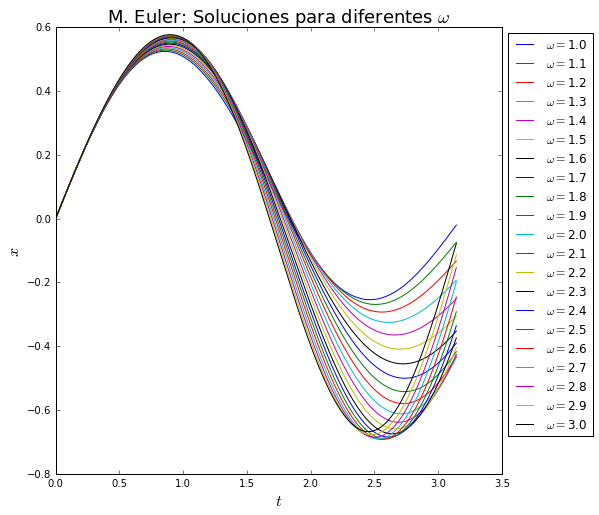

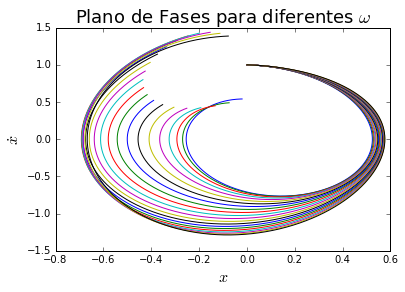

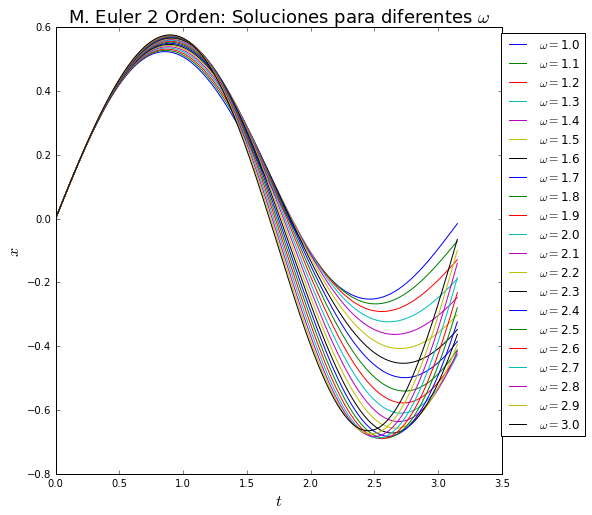

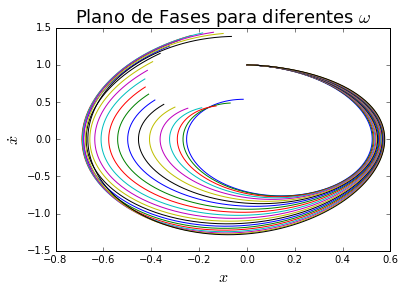

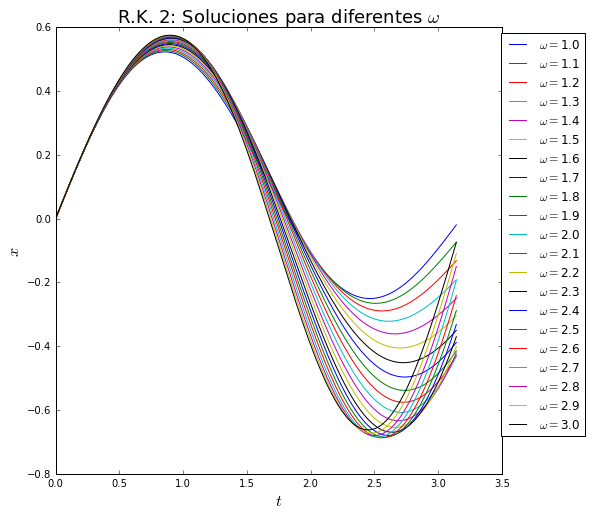

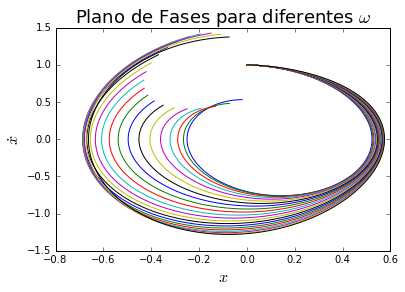

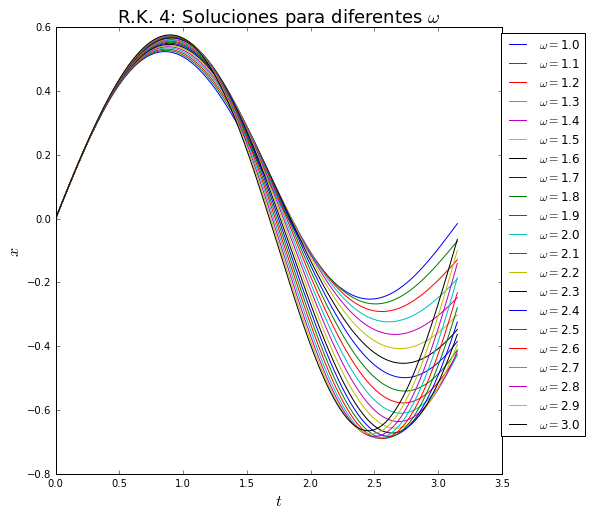

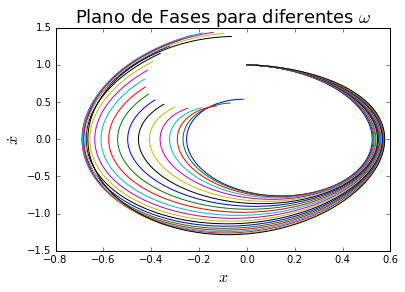

In [14]:
figure(figsize=(8,8),dpi=100)
w_s=arange(1,3.1,0.1) #w's que son del interes
for w in w_s: #para cada w en w_S 
    t,sol=euler_arg(ec_dif3,[0,1],[0,pi],0.001,w) #hago la integracion
    plot(t,sol[:,0],label=r'$\omega=$'+str(w)) #grafico los resultados en funcion del tiempo
title('M. Euler: Soluciones para diferentes $\omega$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$x$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1,1))
show()

for w in w_s:
    t,sol=euler_arg(ec_dif3,[0,1],[0,pi],0.001,w)
    plot(sol[:,0],sol[:,1]) #grafico el plano fase para cada w
title('Plano de Fases para diferentes $\omega$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$\dot{x}$',fontsize=16)
xlabel(r'$x$',fontsize=16)
show()

figure(figsize=(8,8),dpi=100)
for w in w_s:
    t,sol=integra2_arg(ec_dif3,jac3,[0,1],[0,pi],0.01,w) #hago la integracion
    plot(t,sol[:,0],label=r'$\omega=$'+str(w)) #grafico los resultados en funcion del tiempo
title('M. Euler 2 Orden: Soluciones para diferentes $\omega$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$x$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
show()

for w in w_s:
    t,sol=integra2_arg(ec_dif3,jac3,[0,1],[0,pi],0.01,w)
    plot(sol[:,0],sol[:,1])  #grafico el plano fase para cada w
title('Plano de Fases para diferentes $\omega$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$\dot{x}$',fontsize=16)
xlabel(r'$x$',fontsize=16)
#legend(loc=0, bbox_to_anchor=(1.2,1))
show()

figure(figsize=(8,8),dpi=100)
for w in w_s:
    t,sol=RK2_arg(ec_dif3,[0,1],[0,pi],0.001,w)  #hago la integracion
    plot(t,sol[:,0],label=r'$\omega=$'+str(w)) #grafico los resultados en funcion del tiempo
title('R.K. 2: Soluciones para diferentes $\omega$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$x$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
show()

for w in w_s:
    t,sol=RK2_arg(ec_dif3,[0,1],[0,pi],0.001,w)
    plot(sol[:,0],sol[:,1]) #grafico el plano fase para cada w
title('Plano de Fases para diferentes $\omega$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$\dot{x}$',fontsize=16)
xlabel(r'$x$',fontsize=16)
#legend(loc=0, bbox_to_anchor=(1.2,1))
show()

figure(figsize=(8,8),dpi=100)
for w in w_s:
    t,sol=RK4_arg(ec_dif3,[0,1],[0,pi],0.01,w) #hago la integracion
    plot(t,sol[:,0],label=r'$\omega=$'+str(w))#grafico los resultados en funcion del tiempo
title('R.K. 4: Soluciones para diferentes $\omega$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$x$',fontsize=16)
xlabel(r'$t$',fontsize=16)
legend(loc=0, bbox_to_anchor=(1.2,1))
show()

for w in w_s:
    t,sol=RK4_arg(ec_dif3,[0,1],[0,pi],0.01,w)
    plot(sol[:,0],sol[:,1])#grafico el plano fase para cada w
title('Plano de Fases para diferentes $\omega$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$\dot{x}$',fontsize=16)
xlabel(r'$x$',fontsize=16)
#legend(loc=0, bbox_to_anchor=(1.2,1))
show()

Lo que se observa de las gráficas es que la amplitud incrementa a medida que la frecuencia del oscilador aumenta, alcanzando un máximo y luego disminuye, esto quiza debido al efecto de resonancia. Ademas la frecuencia de oscilacion del sistema cambia ligeramenta tambien a medida que la frecuencia del forzamiento se modifica primero disminuyendo la frecuencia y luego volviendo a aumentar, nuevamente eso debido a que en algun momento la frecuencia de frozamiento iguala a la frecuencia natural del sistema.

### 4.Considere el siguiente sistema de ecuaciones diferenciales.
$$
\frac{dx}{dt}=10(y-x)
$$
$$
\frac{dy}{dt}=x(28-z)-y
$$
$$
\frac{dz}{dt}=xy - \frac{8}{3}z
$$

Realice una integración numérica del sistema de ecuaciones con alguno de los integradores del problema (el que más le guste) y realice los siguientes ejercicios:

(a) Elija una condición inicial aleatoria en el $x, y, z \in [−5, 5]$ y realice la gráfica de la solución en el plano $xy$, $xz$ y $yz$ y comente sus observaciones.

(b) Ahora tome 3 soluciones parecidas. Para ello proponga 3 condiciones iniciales tales que en la coordenada en $y$ las condiciones iniciales difieran entre si en $10^{−2}$. Explique lo que observa.


In [15]:
def ec_dif4(x,t): #ecuacion diferencial a integrar
    return array([10*(x[1]-x[0]),x[0]*(28-x[2])-x[1],x[0]*x[1]-8*x[2]/3.])

Condición inicial es: [4.944007363844673, -0.5872932614244109, -1.0706633818194486]


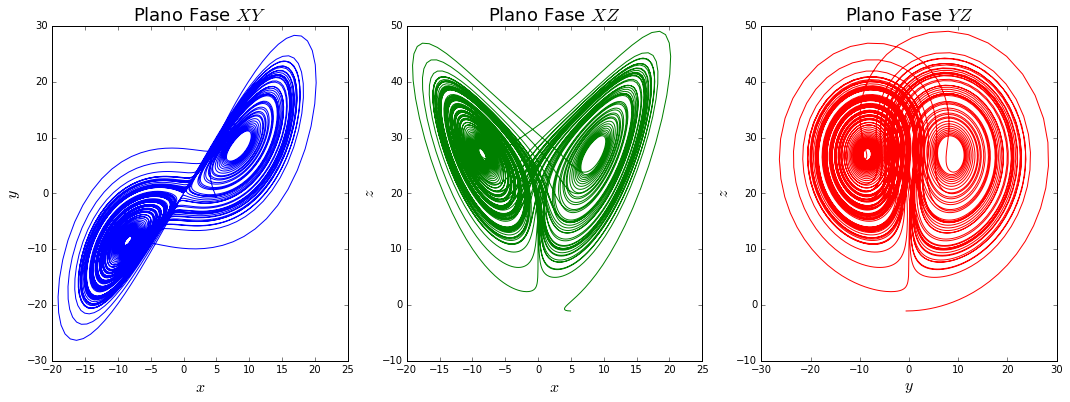

In [16]:
cond_ini=[10*rand()-5,10*rand()-5,10*rand()-5] #condicion inicial aleatoria
t,sol=RK4(ec_dif4,cond_ini,[0,100],0.01) #metodo elegido es Runge-Kutta de 4  Orden
figure(figsize=(18,6),dpi=100)
subplot(1,3,1)
plot(sol[:,0],sol[:,1])
title('Plano Fase $XY$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$y$',fontsize=16)
xlabel(r'$x$',fontsize=16)
subplot(1,3,2)
plot(sol[:,0],sol[:,2],'g')
title('Plano Fase $XZ$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$z$',fontsize=16)
xlabel(r'$x$',fontsize=16)
subplot(1,3,3)
plot(sol[:,1],sol[:,2],'r')
title('Plano Fase $YZ$',fontsize=18) #titulo y leyenda a ejes
ylabel(r'$z$',fontsize=16)
xlabel(r'$y$',fontsize=16)
print 'Condición inicial es:', cond_ini
show()

Condicion inicial 1: (5, 2, 3)
Condicion inicial 2: (5, 2.01, 3)
Condicion inicial 3: (5, 2.02, 3)


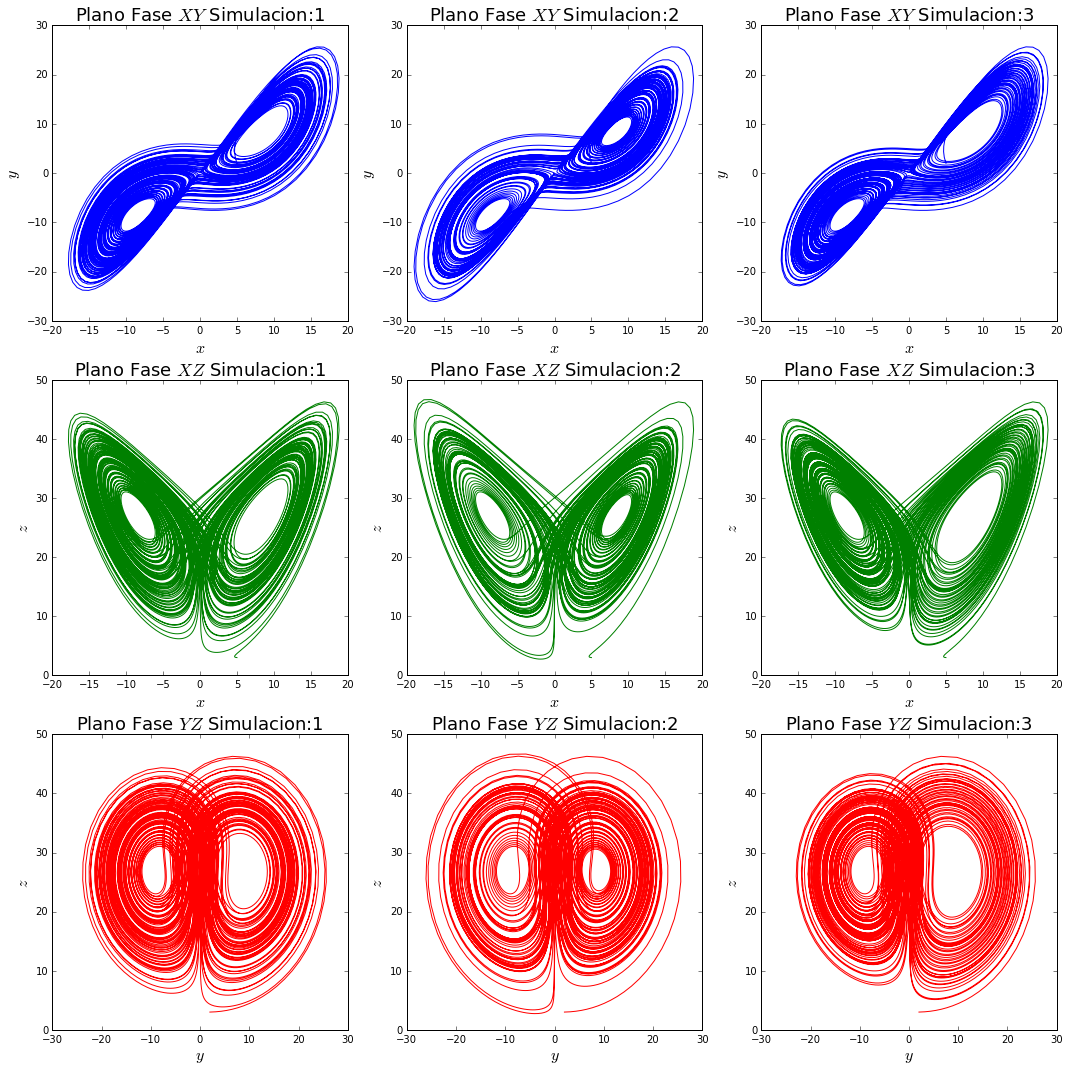

In [17]:
a,b,c=5,2,3
figure(figsize=(18,18),dpi=100)
for i in range(3):
    t,sol=RK4(ec_dif4,[a,b+0.01*i,c],[0,100],0.01)
    subplot(3,3,i+1)
    plot(sol[:,0],sol[:,1],'b')
    title('Plano Fase $XY$ Simulacion:'+str(i+1),fontsize=18) #titulo y leyenda a ejes
    ylabel(r'$y$',fontsize=16)
    xlabel(r'$x$',fontsize=16)
    subplot(3,3,i+4)
    plot(sol[:,0],sol[:,2],'g')
    title('Plano Fase $XZ$ Simulacion:'+str(i+1),fontsize=18) #titulo y leyenda a ejes
    ylabel(r'$z$',fontsize=16)
    xlabel(r'$x$',fontsize=16)
    subplot(3,3,i+7)
    plot(sol[:,1],sol[:,2],'r')
    title('Plano Fase $YZ$ Simulacion:'+str(i+1),fontsize=18) #titulo y leyenda a ejes
    ylabel(r'$z$',fontsize=16)
    xlabel(r'$y$',fontsize=16)
print 'Condicion inicial 1:',(a,b,c)
print 'Condicion inicial 2:',(a,b+0.01,c)
print 'Condicion inicial 3:',(a,b+0.02,c)
show()

Las ecuaciones que estamos integrando en este caso corresponden a un sistema del tipo Atractor de Lorentz, los cuales son sistemas sensibles a las condiciones iniciales, mejor conocidos como sistemas caóticos, estos sistemas tienen la peculiaridad de que dadas dos condiciones iniciales distintas pero muy cercanas entre ellas despues de un tiempo muy largo tendran trayectorias distintas. Esto esta demostrado en las gráficas de arriba al variar la condicion inicial en $y$, se observa como las tres simulaciones son parecidad (mantienen la forma del atractor), pero la dinámica cambio, no son copias exacras si no sus periodos de atraccion se ven modificados, a tal grado que son visibles en las proyecciones del plano fase, cosa que no ocurre si el sistema fuera completamente determinista como ocurre con osciladores armónicos.